In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [200]:
harvested_data = pd.read_csv('FAOSTAT_data_3-11-2020.csv')
harvested_data.dropna(inplace=True)
harvested_data.columns =['Domain','Area','Element','Crop','Year','Harvested Area']
print(harvested_data.head())

  Domain     Area         Element                 Crop  Year  Harvested Area
0  Crops  Nigeria  Area harvested  Carrots and turnips  1971           20000
1  Crops  Nigeria  Area harvested  Carrots and turnips  1972           20000
2  Crops  Nigeria  Area harvested  Carrots and turnips  1973           20000
3  Crops  Nigeria  Area harvested  Carrots and turnips  1974           20000
4  Crops  Nigeria  Area harvested  Carrots and turnips  1975           20000


In [201]:
harvested_data.drop(["Domain","Element"],axis=1,inplace = True)

In [202]:
yield_data = pd.read_csv('FAOSTAT_data_3-11-2020 (1).csv')
yield_data.dropna(inplace=True)
yield_data.columns =['Domain','Area','Element','Crop','Year','Yield']
yield_data.head()


,Domain,Area,Element,Crop,Year,Yield
0,Crops,Nigeria,Yield,Carrots and turnips,1971,75000
1,Crops,Nigeria,Yield,Carrots and turnips,1972,75000
2,Crops,Nigeria,Yield,Carrots and turnips,1973,75000
3,Crops,Nigeria,Yield,Carrots and turnips,1974,75000
4,Crops,Nigeria,Yield,Carrots and turnips,1975,75000


In [203]:
yield_data.drop(["Domain","Element"],axis=1,inplace = True)

In [204]:
production_data = pd.read_csv('FAOSTAT_data_3-11-2020 (2).csv')
production_data.dropna(inplace=True)
production_data.columns =['Domain','Area','Element','Crop','Year','Production']
production_data.head()

,Domain,Area,Element,Crop,Year,Production
0,Crops,Nigeria,Production,Carrots and turnips,1971,150000
1,Crops,Nigeria,Production,Carrots and turnips,1972,150000
2,Crops,Nigeria,Production,Carrots and turnips,1973,150000
3,Crops,Nigeria,Production,Carrots and turnips,1974,150000
4,Crops,Nigeria,Production,Carrots and turnips,1975,150000


In [205]:
production_data.drop(["Domain","Element"],axis=1,inplace = True)

In [206]:
agric_data1 = harvested_data.merge(yield_data, on = ['Area','Crop','Year'],how = 'outer')
agric_data1.head()

,Area,Crop,Year,Harvested Area,Yield
0,Nigeria,Carrots and turnips,1971,20000,75000
1,Nigeria,Carrots and turnips,1972,20000,75000
2,Nigeria,Carrots and turnips,1973,20000,75000
3,Nigeria,Carrots and turnips,1974,20000,75000
4,Nigeria,Carrots and turnips,1975,20000,75000


In [207]:
agric_data = agric_data1.merge(production_data, on = ['Area','Crop','Year'], how = 'outer')
agric_data.head()

,Area,Crop,Year,Harvested Area,Yield,Production
0,Nigeria,Carrots and turnips,1971,20000,75000,150000
1,Nigeria,Carrots and turnips,1972,20000,75000,150000
2,Nigeria,Carrots and turnips,1973,20000,75000,150000
3,Nigeria,Carrots and turnips,1974,20000,75000,150000
4,Nigeria,Carrots and turnips,1975,20000,75000,150000


In [208]:
agric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1294
Data columns (total 6 columns):
Area              1295 non-null object
Crop              1295 non-null object
Year              1295 non-null int64
Harvested Area    1295 non-null int64
Yield             1295 non-null int64
Production        1295 non-null int64
dtypes: int64(4), object(2)
memory usage: 70.8+ KB


In [209]:
agric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1295.0,1.988000e+03,1.010341e+01,1971.0,1979.0,1988.0,1997.0,2005.0
Harvested Area,1295.0,6.708531e+05,1.266326e+06,160.0,43500.0,131832.0,583500.0,7284000.0
Yield,1295.0,4.671677e+04,6.188869e+04,1556.0,9046.5,26158.0,67632.5,410714.0
Production,1295.0,1.966968e+06,4.827091e+06,80.0,100000.0,436000.0,1245500.0,41565000.0


In [210]:
agric_data.isna().any()

Area              False
Crop              False
Year              False
Harvested Area    False
Yield             False
Production        False
dtype: bool

In [211]:
for i in agric_data.columns:
    print(i)
    print(len(agric_data[i].unique()))
    print(agric_data[i].unique())

Area
1
['Nigeria']
Crop
37
['Carrots and turnips' 'Cashew nuts, with shell' 'Cassava'
 'Chillies and peppers, dry' 'Chillies and peppers, green' 'Cocoa, beans'
 'Coconuts' 'Fruit, fresh nes' 'Ginger' 'Groundnuts, with shell'
 'Kola nuts' 'Maize' 'Maize, green' 'Mangoes, mangosteens, guavas'
 'Melonseed' 'Millet' 'Oil palm fruit' 'Okra' 'Onions, dry' 'Papayas'
 'Pineapples' 'Plantains and others' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Rubber, natural' 'Sesame seed' 'Sorghum' 'Soybeans' 'Sugar cane'
 'Sweet potatoes' 'Taro (cocoyam)' 'Tobacco, unmanufactured' 'Tomatoes'
 'Vegetables, fresh nes' 'Wheat' 'Yams']
Year
35
[1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005]
Harvested Area
754
[  20000   21000   22000   22303   21228   18000   24000   24285   24551
   25000   26000   27000   26492   26729   27500   27159   27339   27750
   40000   50000   75000   9000

In [212]:
agric_data.columns.values

array(['Area', 'Crop', 'Year', 'Harvested Area', 'Yield', 'Production'],
      dtype=object)

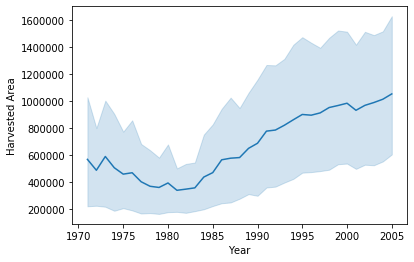

In [213]:
sns.lineplot(agric_data['Year'],agric_data['Harvested Area'])

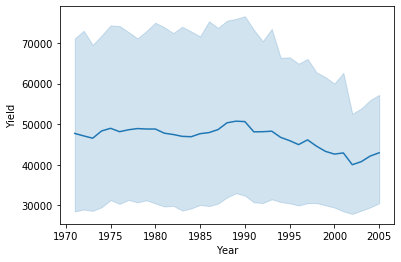

In [214]:
sns.lineplot(agric_data['Year'],agric_data['Yield'])

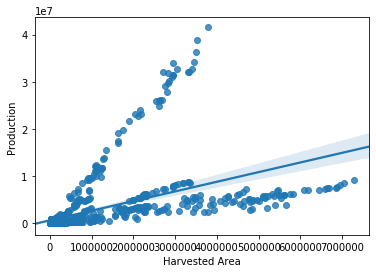

In [215]:
sns.regplot(x='Harvested Area',y= 'Production',data=agric_data)

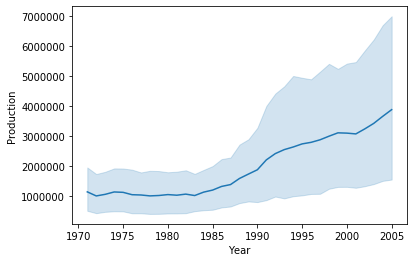

In [216]:
sns.lineplot(agric_data['Year'],agric_data['Production'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

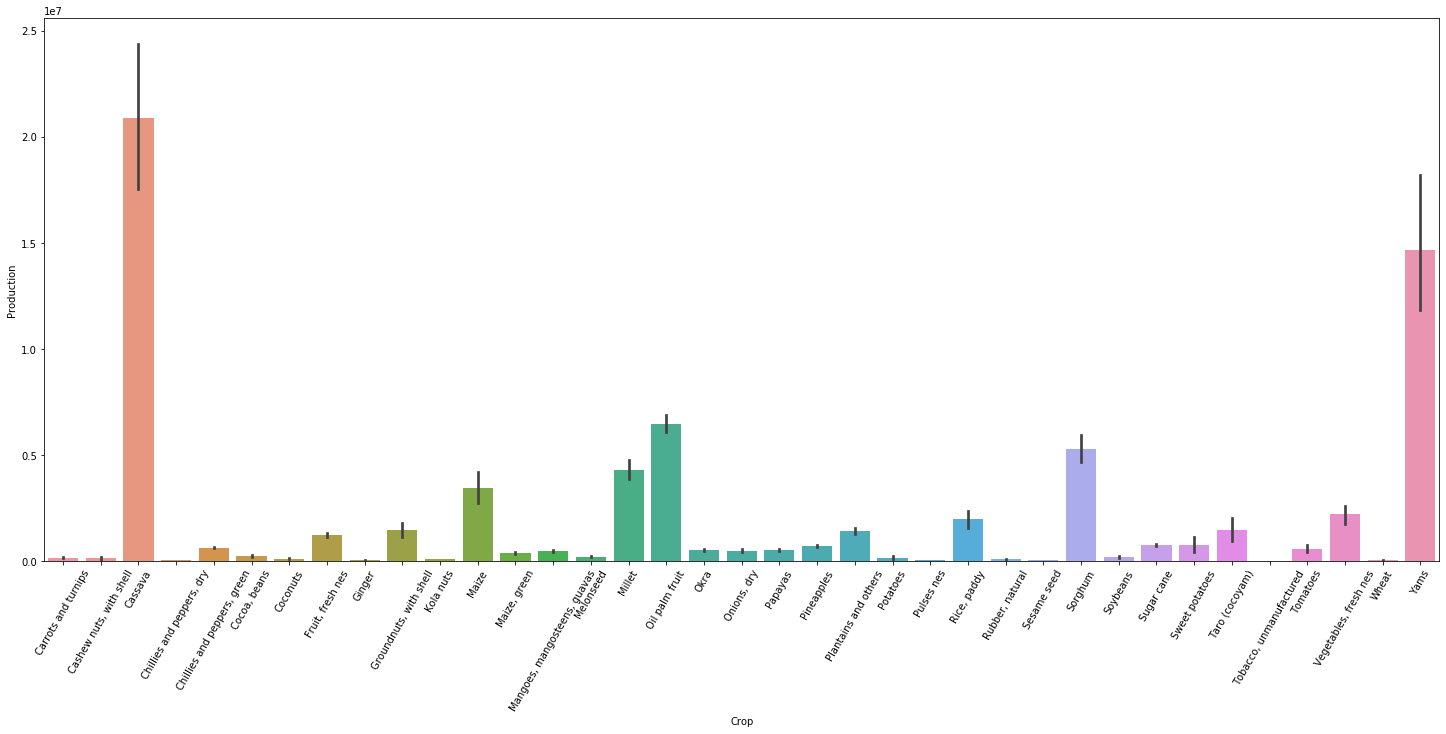

In [217]:
plt.figure(figsize=(25,10))
sns.barplot(agric_data["Crop"],agric_data["Production"])
plt.xticks(rotation=60)

In [218]:
for i in agric_data.columns:
    print(i)
    print(len(agric_data[i].unique()))
    print(agric_data[i].unique())

Area
1
['Nigeria']
Crop
37
['Carrots and turnips' 'Cashew nuts, with shell' 'Cassava'
 'Chillies and peppers, dry' 'Chillies and peppers, green' 'Cocoa, beans'
 'Coconuts' 'Fruit, fresh nes' 'Ginger' 'Groundnuts, with shell'
 'Kola nuts' 'Maize' 'Maize, green' 'Mangoes, mangosteens, guavas'
 'Melonseed' 'Millet' 'Oil palm fruit' 'Okra' 'Onions, dry' 'Papayas'
 'Pineapples' 'Plantains and others' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Rubber, natural' 'Sesame seed' 'Sorghum' 'Soybeans' 'Sugar cane'
 'Sweet potatoes' 'Taro (cocoyam)' 'Tobacco, unmanufactured' 'Tomatoes'
 'Vegetables, fresh nes' 'Wheat' 'Yams']
Year
35
[1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005]
Harvested Area
754
[  20000   21000   22000   22303   21228   18000   24000   24285   24551
   25000   26000   27000   26492   26729   27500   27159   27339   27750
   40000   50000   75000   9000

In [219]:
top_crop_pro = agric_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro

,Crop,Production
2,Cassava,732029008
36,Yams,513962000
16,Oil palm fruit,227277000
27,Sorghum,185438000
15,Millet,151226000
11,Maize,121415000
34,"Vegetables, fresh nes",77386000
24,"Rice, paddy",69748322
9,"Groundnuts, with shell",51725000
31,Taro (cocoyam),51697720


In [220]:
agric_data.groupby("Crop",axis=0).agg({"Production":np.sum})

,Production
Crop,
Carrots and turnips,6171476
"Cashew nuts, with shell",4802000
Cassava,732029008
"Chillies and peppers, dry",1500569
"Chillies and peppers, green",22870171
"Cocoa, beans",8725500
Coconuts,4381000
"Fruit, fresh nes",43968402
Ginger,1486540


In [221]:
cassava_df = agric_data[agric_data["Crop"]=="Cassava"]
print(cassava_df.shape)
cassava_df[:3]

(35, 6)


,Area,Crop,Year,Harvested Area,Yield,Production
70,Nigeria,Cassava,1971,900000,101911,9172000
71,Nigeria,Cassava,1972,960000,99688,9570000
72,Nigeria,Cassava,1973,970000,98969,9600000


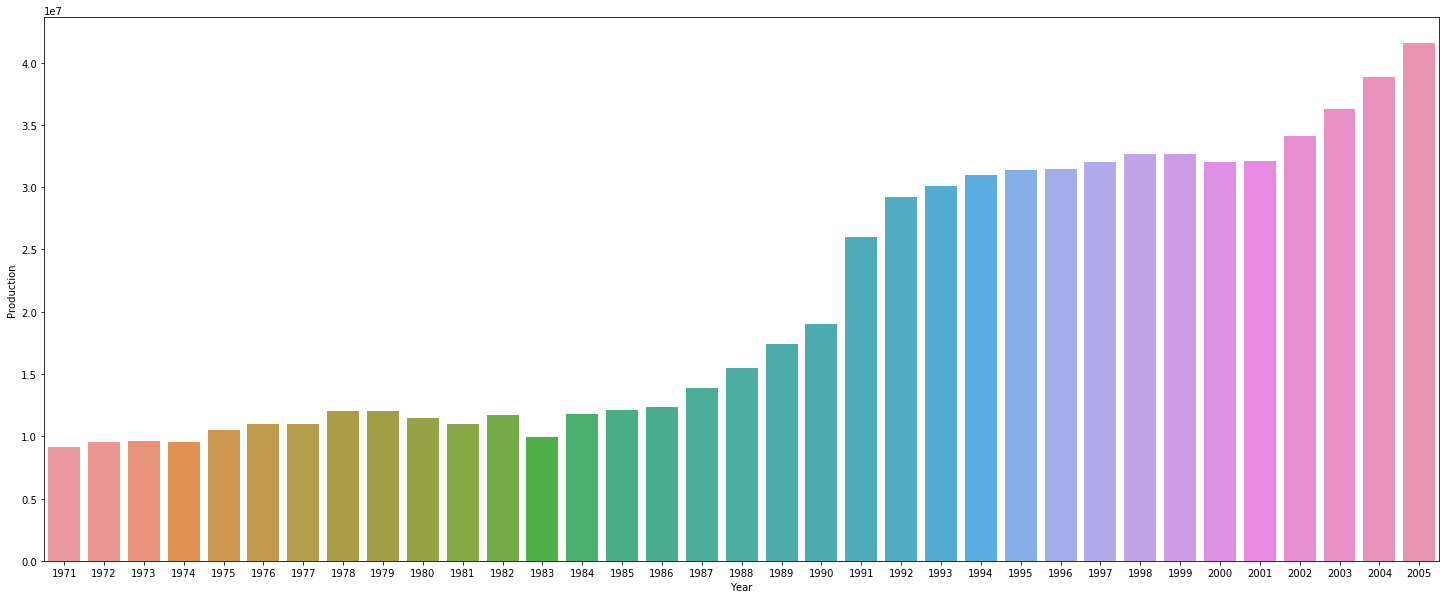

In [222]:
plt.figure(figsize=(25,10))
sns.barplot("Year","Production",data=cassava_df)

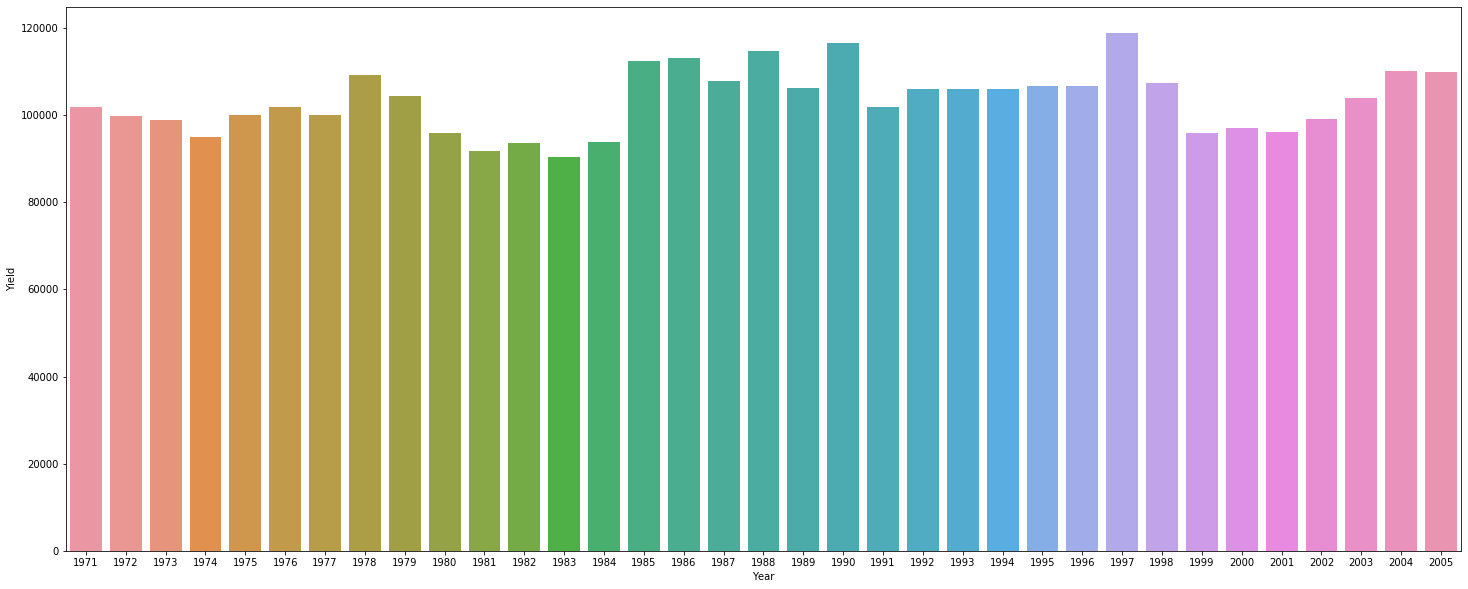

In [223]:
plt.figure(figsize=(25,10))
sns.barplot("Year","Yield",data=cassava_df)

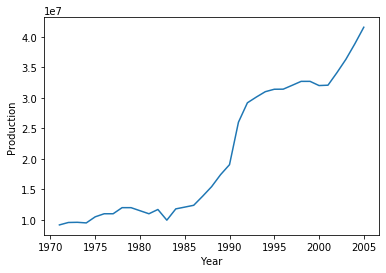

In [224]:
sns.lineplot(cassava_df['Year'],cassava_df['Production'])

<Figure size 1440x720 with 0 Axes>

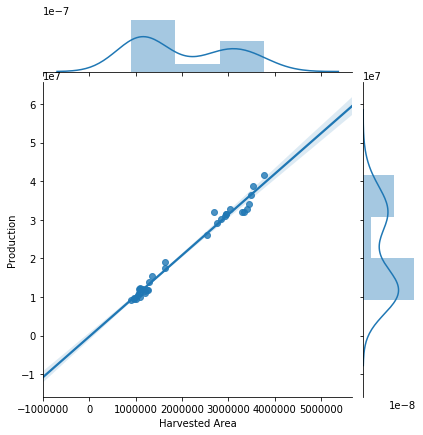

In [225]:
plt.figure(figsize=(20,10))
sns.jointplot(cassava_df["Harvested Area"],cassava_df["Production"],kind='reg')

In [226]:
yam_df = agric_data[agric_data["Crop"]=="Yams"]
print(yam_df.shape)
yam_df[:5]

(35, 6)


,Area,Crop,Year,Harvested Area,Yield,Production
1260,Nigeria,Yams,1971,1236000,79013,9766000
1261,Nigeria,Yams,1972,932000,74034,6900000
1262,Nigeria,Yams,1973,948000,73154,6935000
1263,Nigeria,Yams,1974,671000,106706,7160000
1264,Nigeria,Yams,1975,776000,111095,8621000


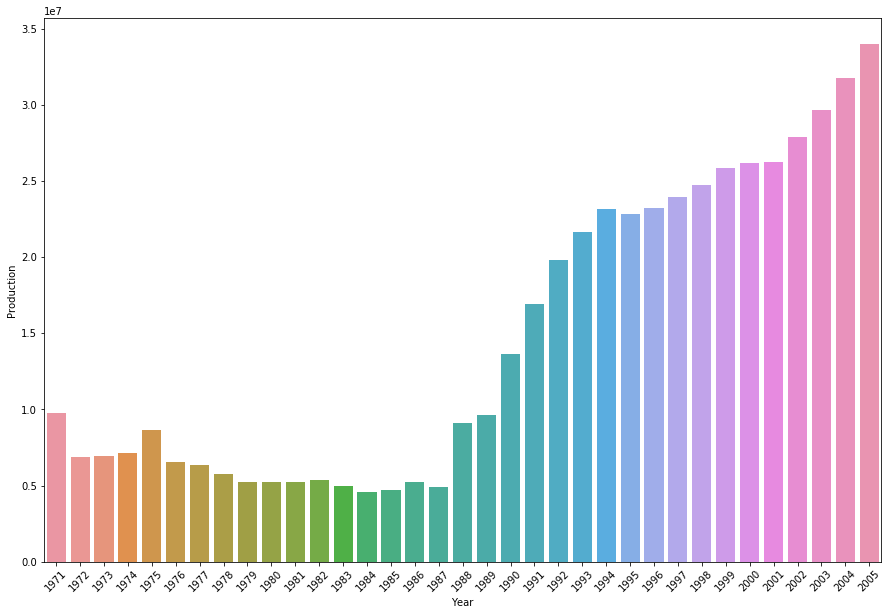

In [227]:
plt.figure(figsize=(15,10))
sns.barplot("Year","Production",data=yam_df)
plt.xticks(rotation=45)
plt.show()

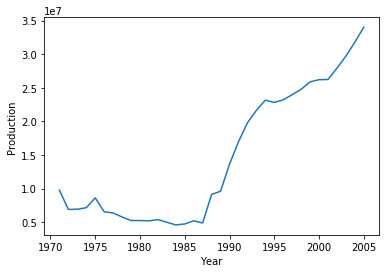

In [193]:
sns.lineplot(yam_df['Year'],yam_df['Production'])

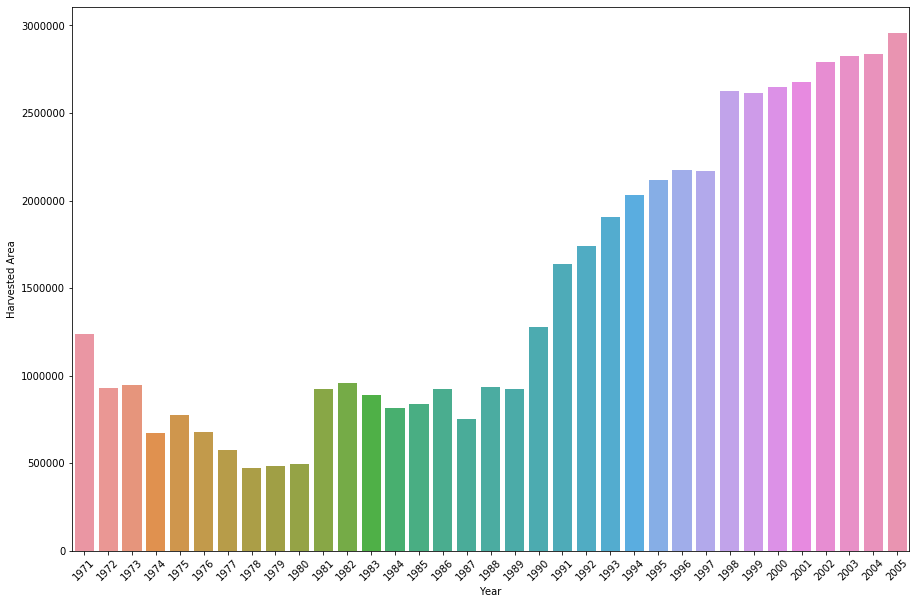

In [106]:
plt.figure(figsize=(15,10))
sns.barplot("Year","Harvested Area",data=yam_df)
plt.xticks(rotation=45)
plt.show()

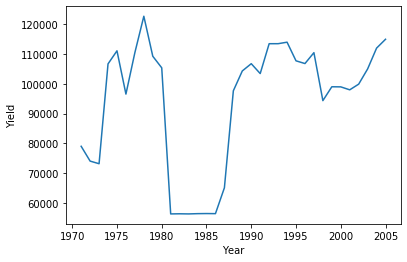

In [107]:
sns.lineplot(yam_df['Year'],yam_df['Yield'])

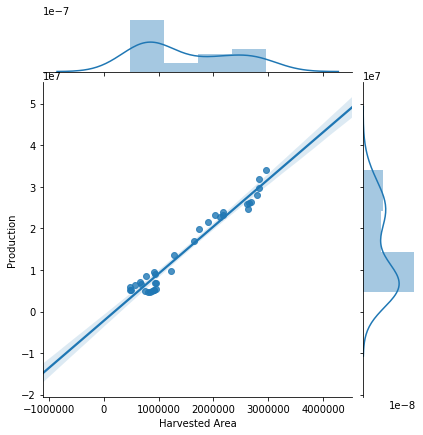

In [108]:
sns.jointplot("Harvested Area","Production",data=yam_df,kind="reg")

In [109]:
Oil_df = agric_data[agric_data["Crop"]=="Oil palm fruit"]
print(Oil_df.shape)
Oil_df[:3]

(35, 6)


,Area,Crop,Year,Harvested Area,Yield,Production
560,Nigeria,Oil palm fruit,1971,2150000,25000,5375000
561,Nigeria,Oil palm fruit,1972,2000000,25000,5000000
562,Nigeria,Oil palm fruit,1973,2000000,25000,5000000


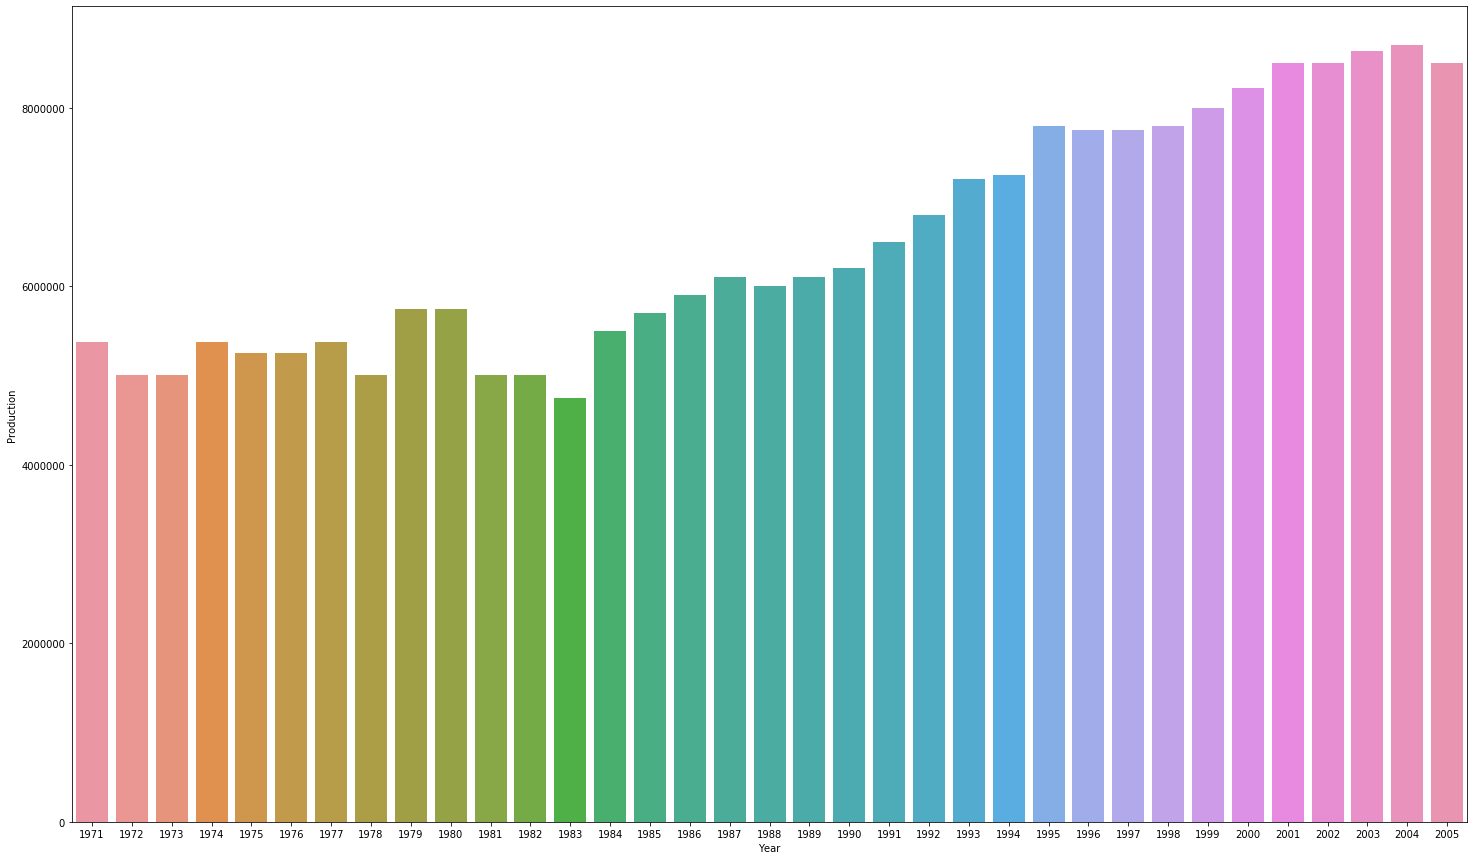

In [110]:
plt.figure(figsize=(25,15))
sns.barplot("Year","Production",data=Oil_df)

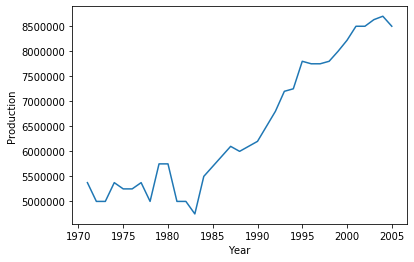

In [228]:
sns.lineplot(Oil_df['Year'],Oil_df['Production'])

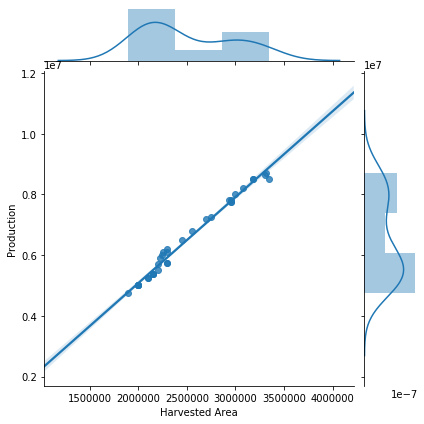

In [111]:
sns.jointplot("Harvested Area","Production",data=Oil_df,kind="reg")

In [112]:
Rice_df = agric_data[agric_data["Crop"]=="Rice, paddy"]
print(Rice_df.shape)
Rice_df[:3]

(35, 6)


,Area,Crop,Year,Harvested Area,Yield,Production
840,Nigeria,"Rice, paddy",1971,304000,12763,388000
841,Nigeria,"Rice, paddy",1972,237000,18861,447000
842,Nigeria,"Rice, paddy",1973,373000,13056,487000


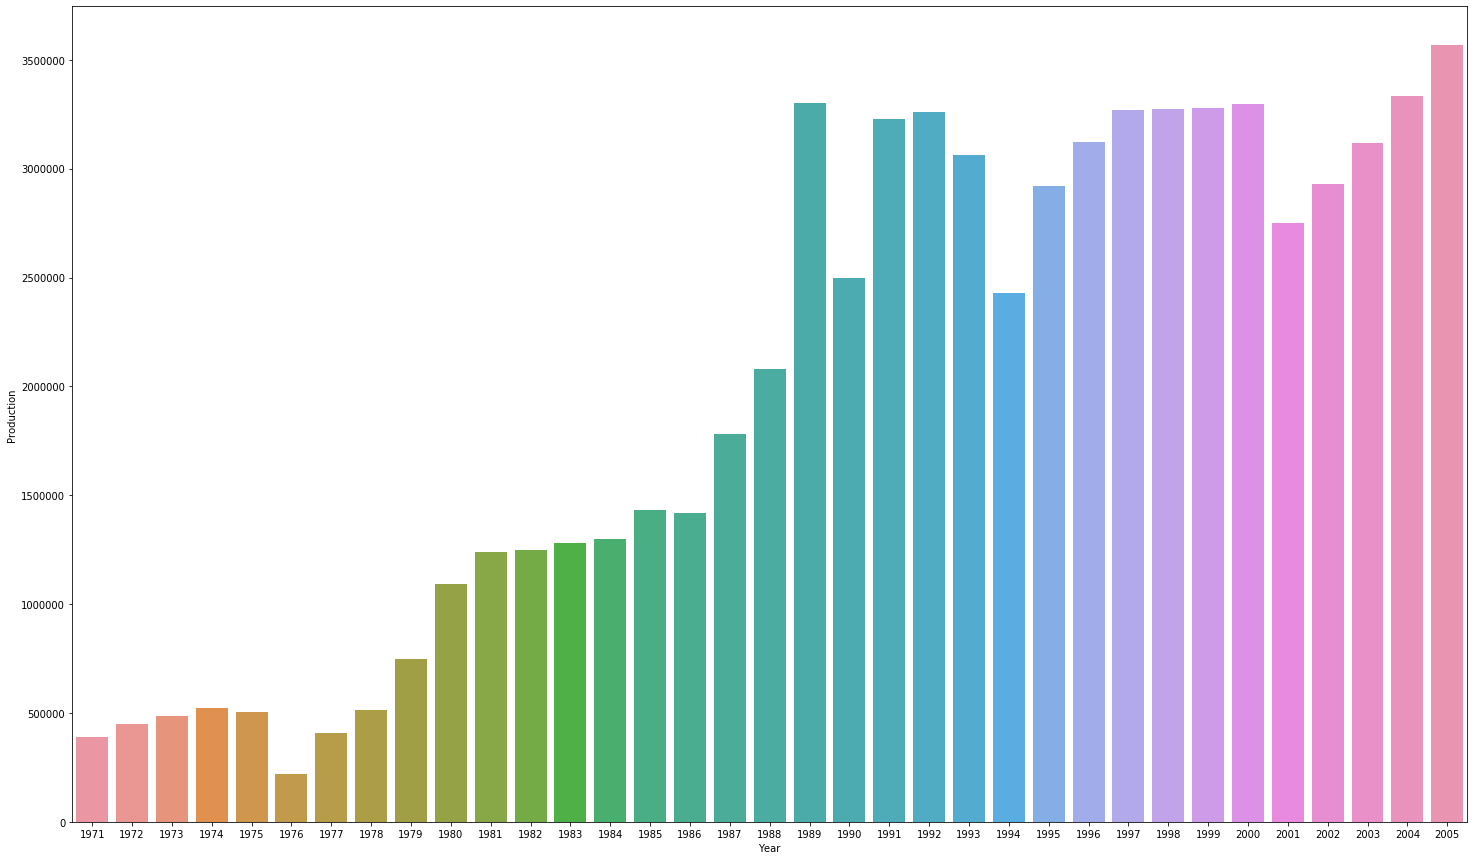

In [113]:
plt.figure(figsize=(25,15))
sns.barplot("Year","Production",data=Rice_df)

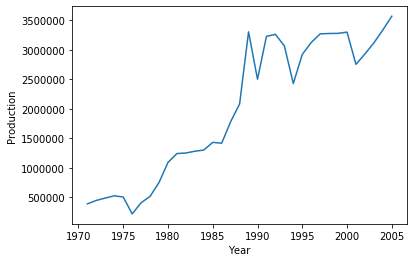

In [197]:
sns.lineplot(Rice_df['Year'],Rice_df['Production'])

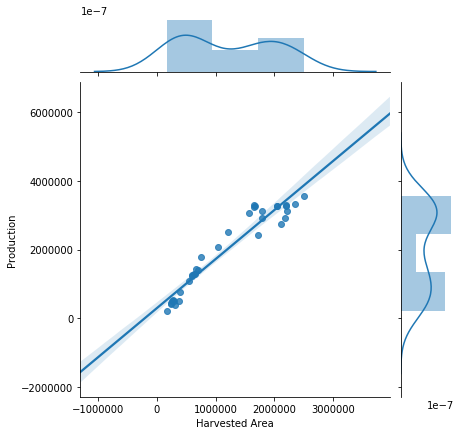

In [114]:
sns.jointplot("Harvested Area","Production",data=Rice_df,kind="reg")

In [115]:
Maize_df = agric_data[agric_data["Crop"]=="Maize"]
print(Maize_df.shape)
Maize_df[:3]

(35, 6)


,Area,Crop,Year,Harvested Area,Yield,Production
385,Nigeria,Maize,1971,1218000,10460,1274000
386,Nigeria,Maize,1972,1115000,5731,639000
387,Nigeria,Maize,1973,1246000,6485,808000


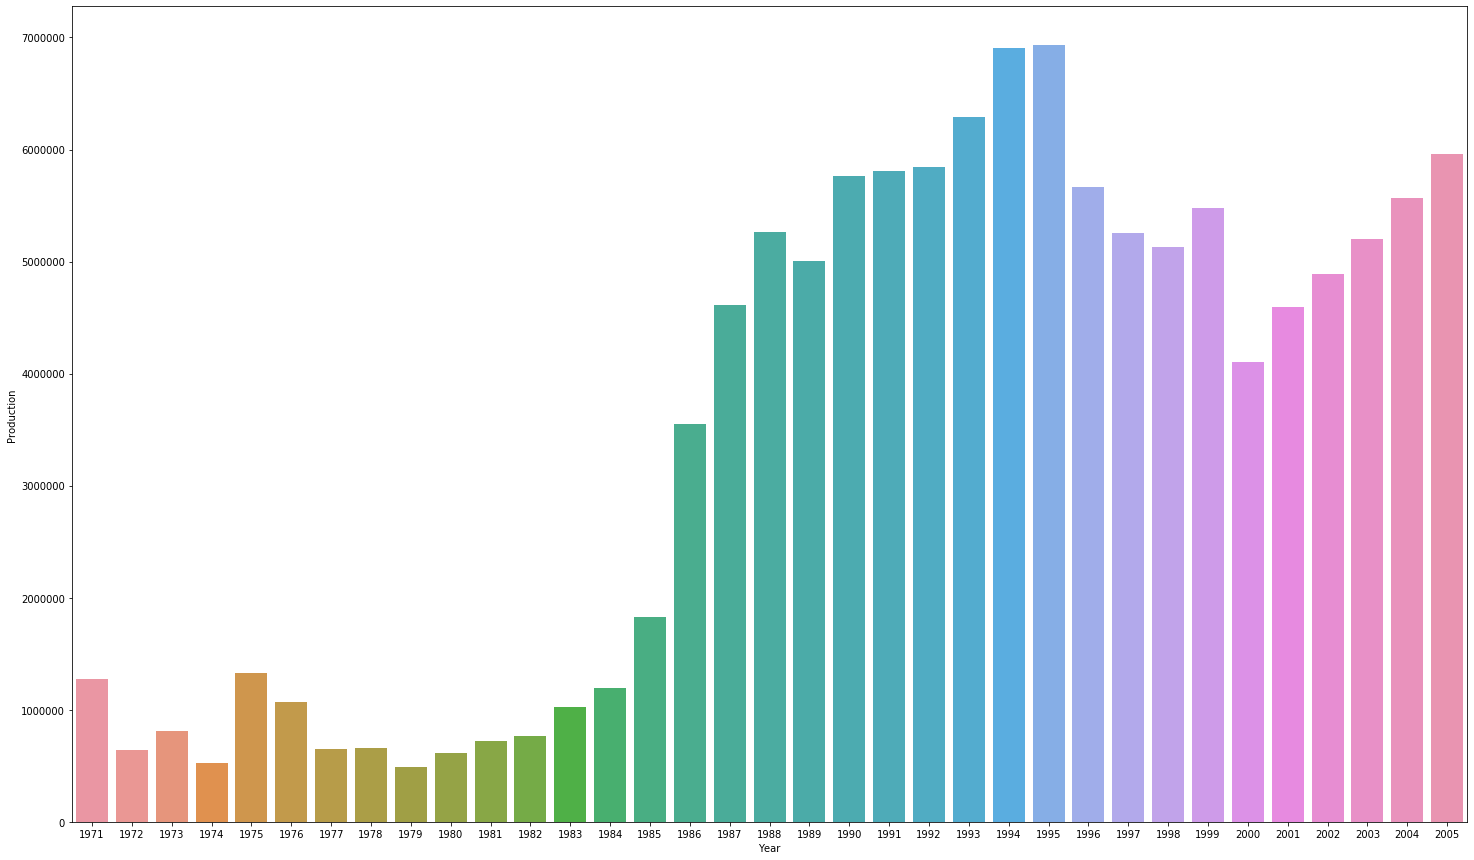

In [116]:
plt.figure(figsize=(25,15))
sns.barplot("Year","Production",data=Maize_df)

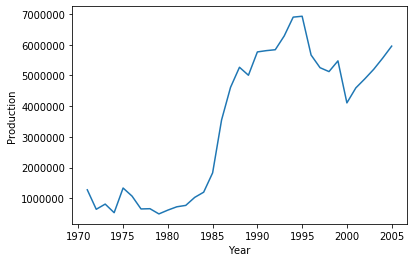

In [229]:
sns.lineplot(Maize_df['Year'],Maize_df['Production'])

In [117]:
agric_data = agric_data.drop(["Area"],axis=1)
agric_data.head()

,Crop,Year,Harvested Area,Yield,Production
0,Carrots and turnips,1971,20000,75000,150000
1,Carrots and turnips,1972,20000,75000,150000
2,Carrots and turnips,1973,20000,75000,150000
3,Carrots and turnips,1974,20000,75000,150000
4,Carrots and turnips,1975,20000,75000,150000


In [118]:
First = cassava_df.merge(yam_df,how = 'outer')
First

,Area,Crop,Year,Harvested Area,Yield,Production
0,Nigeria,Cassava,1971,900000,101911,9172000
1,Nigeria,Cassava,1972,960000,99688,9570000
2,Nigeria,Cassava,1973,970000,98969,9600000
3,Nigeria,Cassava,1974,1000000,95000,9500000
4,Nigeria,Cassava,1975,1050000,100000,10500000
...,...,...,...,...,...,...
65,Nigeria,Yams,2001,2677000,97990,26232000
66,Nigeria,Yams,2002,2794000,99896,27911000
67,Nigeria,Yams,2003,2828000,105011,29697000
68,Nigeria,Yams,2004,2837000,112006,31776000


In [119]:
agric_data = pd.get_dummies(agric_data)
agric_data.head()

,Year,Harvested Area,Yield,Production,Crop_Carrots and turnips,"Crop_Cashew nuts, with shell",Crop_Cassava,"Crop_Chillies and peppers, dry","Crop_Chillies and peppers, green","Crop_Cocoa, beans",...,Crop_Sorghum,Crop_Soybeans,Crop_Sugar cane,Crop_Sweet potatoes,Crop_Taro (cocoyam),"Crop_Tobacco, unmanufactured",Crop_Tomatoes,"Crop_Vegetables, fresh nes",Crop_Wheat,Crop_Yams
0,1971,20000,75000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,20000,75000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1973,20000,75000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1974,20000,75000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1975,20000,75000,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
Second = First.merge(Oil_df,how = 'outer')
Second

,Area,Crop,Year,Harvested Area,Yield,Production
0,Nigeria,Cassava,1971,900000,101911,9172000
1,Nigeria,Cassava,1972,960000,99688,9570000
2,Nigeria,Cassava,1973,970000,98969,9600000
3,Nigeria,Cassava,1974,1000000,95000,9500000
4,Nigeria,Cassava,1975,1050000,100000,10500000
...,...,...,...,...,...,...
100,Nigeria,Oil palm fruit,2001,3180000,26730,8500000
101,Nigeria,Oil palm fruit,2002,3180000,26730,8500000
102,Nigeria,Oil palm fruit,2003,3300000,26158,8632000
103,Nigeria,Oil palm fruit,2004,3320000,26205,8700000


In [121]:
Third = Second.merge(Rice_df,how = 'outer')
Third

,Area,Crop,Year,Harvested Area,Yield,Production
0,Nigeria,Cassava,1971,900000,101911,9172000
1,Nigeria,Cassava,1972,960000,99688,9570000
2,Nigeria,Cassava,1973,970000,98969,9600000
3,Nigeria,Cassava,1974,1000000,95000,9500000
4,Nigeria,Cassava,1975,1050000,100000,10500000
...,...,...,...,...,...,...
135,Nigeria,"Rice, paddy",2001,2117000,13000,2752000
136,Nigeria,"Rice, paddy",2002,2185000,13400,2928000
137,Nigeria,"Rice, paddy",2003,2210000,14100,3116000
138,Nigeria,"Rice, paddy",2004,2348000,14199,3334000


In [148]:
final_df = Third.merge(Maize_df,how = 'outer')
final_df

,Area,Crop,Year,Harvested Area,Yield,Production
0,Nigeria,Cassava,1971,900000,101911,9172000
1,Nigeria,Cassava,1972,960000,99688,9570000
2,Nigeria,Cassava,1973,970000,98969,9600000
3,Nigeria,Cassava,1974,1000000,95000,9500000
4,Nigeria,Cassava,1975,1050000,100000,10500000
...,...,...,...,...,...,...
170,Nigeria,Maize,2001,3283000,13999,4596000
171,Nigeria,Maize,2002,3282000,14899,4890000
172,Nigeria,Maize,2003,3469000,14999,5203000
173,Nigeria,Maize,2004,3479000,16002,5567000


In [230]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
x= cassava_df['Year']
y1 = cassava_df['Production']
y2 = yam_df['Production']
y3 = Oil_df['Production']
y4 = Rice_df['Production']
y5 = Maize_df['Production']

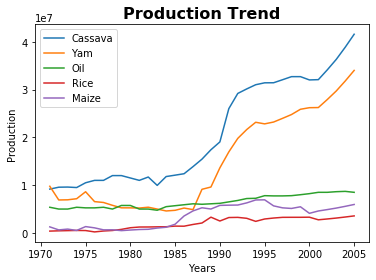

In [239]:
plt.plot(x,y1,label = 'Cassava')
plt.plot(x,y2,label = 'Yam')
plt.plot(x,y3,label = 'Oil')
plt.plot(x,y4,label = 'Rice')
plt.plot(x,y5,label = 'Maize')

plt.legend(loc="upper left")

plt.title("Production Trend", fontsize=16, fontweight='bold')
plt.xlabel("Years")
plt.ylabel("Production")
plt.show()


In [149]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,175.0,1.988000e+03,1.012848e+01,1971.0,1979.0,1988.0,1997.0,2005.0
Harvested Area,175.0,1.972699e+06,1.196566e+06,172000.0,958000.0,2000000.0,2832500.0,5472000.0
Yield,175.0,5.069178e+04,4.093207e+04,5731.0,16012.5,26205.0,99014.5,122718.0
Production,175.0,9.511036e+06,9.783806e+06,218000.0,3271500.0,5768000.0,11000000.0,41565000.0


In [150]:
final_df.drop(['Area','Crop','Year'],axis = 1)

,Harvested Area,Yield,Production
0,900000,101911,9172000
1,960000,99688,9570000
2,970000,98969,9600000
3,1000000,95000,9500000
4,1050000,100000,10500000
...,...,...,...
170,3283000,13999,4596000
171,3282000,14899,4890000
172,3469000,14999,5203000
173,3479000,16002,5567000


In [174]:
X1= final_df.drop(["Production"],axis=1)
Y= final_df[["Production"]]

In [175]:
X = X1.drop(['Area','Crop','Year'],axis = 1)
X

,Harvested Area,Yield
0,900000,101911
1,960000,99688
2,970000,98969
3,1000000,95000
4,1050000,100000
...,...,...
170,3283000,13999
171,3282000,14899
172,3469000,14999
173,3479000,16002


In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 40)

In [181]:
X_train.shape
X_test.shape
Y_train.shape

(117, 1)

In [182]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
preds = model.predict(X_test)
preds

array([[-5103637.60524589],
       [10255604.01074992],
       [ 8139312.77497809],
       [-2265883.06778629],
       [12032024.34152875],
       [ 6319296.92752743],
       [-4386006.81919437],
       [-1914136.25134363],
       [-2271452.88431702],
       [16051419.56401552],
       [ 1267626.47386616],
       [  757207.29514932],
       [-4557167.59713237],
       [-2325004.69283313],
       [24184667.91804653],
       [ 4484611.89329449],
       [24063500.45888566],
       [ 9466284.77434683],
       [19135295.0809987 ],
       [-3508513.80554841],
       [17825282.37769379],
       [ 1712516.68661751],
       [26141145.30418484],
       [ 9703430.5751936 ],
       [25893232.94059016],
       [21667456.67635   ],
       [ 5275710.56441996],
       [-4130725.56549731],
       [-1099809.1560068 ],
       [15048648.59018914],
       [ 7332582.64808314],
       [20640518.41716624],
       [ -721315.22492684],
       [14032278.84709376],
       [21584333.5934491 ],
       [-2020808.020

In [184]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from math import sqrt
print(sqrt(mean_squared_error(Y_test,preds)))
print(r2_score(Y_test,preds))

4508209.490980323
0.7754785893518722


In [185]:
print(model.coef_)
print(model.intercept_)


[[  3.95549336 203.00591908]]
[-8897072.13062858]


In [186]:
model.score(X_train,Y_train)


0.7839114473832481

In [189]:
model.score(preds,Y_test)

ValueError: shapes (58,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [190]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)
preds = model.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [192]:
print(r2_score(Y_test,preds))
print(sqrt(mean_squared_error(Y_test,preds)))

0.9471656962789674
2186921.5396263083
